In [1]:
from IPython.display import Image as Imagepy
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import speech_recognition as sr
from moviepy.editor import *
from TAMtALUm import * 

Di algo:
Dijiste: cuando amamos siempre nos esforzamos por ser mejores de lo que somos cuando nos esforzamos por ser mejor de lo que somos todo a nuestro alrededor se vuelve mejor

[MoviePy] Building file out.gif with imageio


100%|█████████▉| 300/301 [00:08<00:00, 34.72it/s]


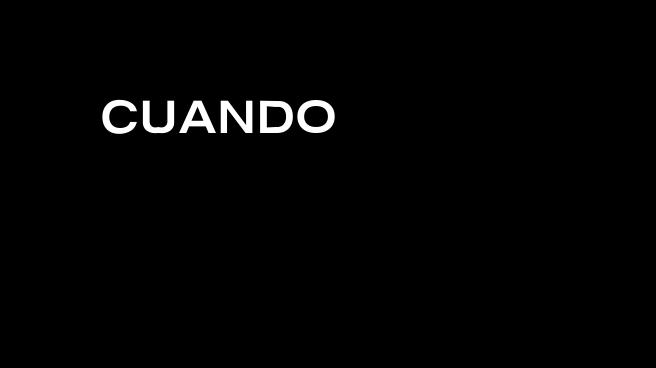

In [2]:
input_path =  os.getcwd()
##Modulo de pruebas con reconocimiento de audio.
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Di algo:")
    audio = r.listen(source)
#Speech recognition using Google Speech Recognition
try:
    text = r.recognize_google(audio,language = "es-ES")
    print("Dijiste: " + text)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
    text = ''
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))
    text = ''
lw = tk.tokenize(text.replace('\n',''))
ls = sp.split(lw)
ls = morfo.analyze(ls)
ls = tagger.analyze(ls)
ls = sen.analyze(ls);
ls = wsd.analyze(ls);
out = ProcessSentences(ls,sdb)
input_path =  os.getcwd()
clip = []
filenames = listdir(input_path+'/Images/')
for lemmas in out.split():
    spell_flag = False
    if lemmas.find('-') != -1:
        letters = lemmas.replace('-','')
        letters = (letters)+'.gif'
        spell_flag = True
    lemmas_ = (lemmas)
    lemmas = (lemmas)+'.gif'
    if lemmas in filenames:
        if spell_flag == True:
            for l in letters:
                clip.append((VideoFileClip(input_path+'/Images/'+l)))
        else:
            clip.append((VideoFileClip(input_path+'/Images/'+lemmas)).set_duration(2))
    else:
        
        if spell_flag == True:
            letters = letters.replace('.gif','')
            for l in letters:
                img = Image.open(input_path+'/Images/default.jpg')
                draw = ImageDraw.Draw(img)
                font = ImageFont.truetype("SSF.ttf", 45)
                draw.text((260,170),l,(255,255,255),font=font)
                img.save('sample_out.jpg')
                clip.append((VideoFileClip(input_path+'/sample_out.jpg')).set_duration(0.5))
        else: 
            img = Image.open(input_path+'/Images/default.jpg')
            draw = ImageDraw.Draw(img)
            font = ImageFont.truetype("SSF.ttf", 45)
            draw.text((100,100),lemmas_,(255,255,255),font=font)
            img.save('sample_out.jpg')
            clip.append((VideoFileClip(input_path+'/sample_out.jpg')).set_duration(1))            
if len(clip)>0:
    composition = concatenate_videoclips(clip)
    composition.write_gif('out.gif', fps=10)
    x = Imagepy(filename="out.gif", width=700) 
    display(x)
else:
    print ('No disponible')
